In [1]:
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import aux_functions_3D as aux
import scipy.stats
import glob
import xarray as xarray

# Plot average thermal profiles (Fig. 13 of the manuscript)
## Files used to make these can be found on the NCCS Data portal (https://portal.nccs.nasa.gov/datashare/giss-camp2ex/) under the 'thermals' directory

In [3]:
#=======================================
# Functions
#=======================================
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx
def calc_mean_std_prof(z_bins,thermal_z,var):
    mean_prof = []
    std_prof = []
    for kk in range(len(z_bins)-1):
        dumid = np.where( (thermal_z > z_bins[kk]) & (thermal_z <= z_bins[kk+1]) )
        if np.size(dumid) > 0.:
            dumid = np.squeeze(dumid)
            mean_prof.append(np.mean(var[dumid]))
            std_prof.append(np.std(var[dumid]))
        else:
            mean_prof.append(np.nan)
            std_prof.append(np.nan)
    mean_prof = np.array(mean_prof)
    std_prof = np.array(std_prof)
    return mean_prof, std_prof

In [4]:
z_bins = np.arange(0,7.5,0.5)*1.e3
z_midbins = np.array([0.5*(z_bins[dd]+z_bins[dd+1]) for dd in range(len(z_bins)-1)])

In [5]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/thermals/'
ncfile_cntl = xarray.open_dataset(path+'CNTL_thermals.nc')
ncfile_sens = xarray.open_dataset(path+'FIXED_AERO_NO_AC_thermals.nc')

In [6]:
# CNTL
z_centre_c_cntl = ncfile_cntl['z_centre_c'].values
z_thermal_cntl = np.nanmean(z_centre_c_cntl, axis=1)
R_avg_cntl = ncfile_cntl['R_avg'].values
w_avg_cntl = ncfile_cntl['w_avg'].values
wmax_avg_cntl = ncfile_cntl['wmax_avg'].values
qcloud_avg_cntl = ncfile_cntl['qcloud_avg'].values
qncloud_avg_cntl = ncfile_cntl['qncloud_avg'].values
qncloud_c_cntl = ncfile_cntl['qncloud_c'].values
qcloud_c_cntl = ncfile_cntl['qcloud_c'].values
reff_c_avg_cntl = ncfile_cntl['reff_c_avg'].values
reff_c_c_cntl = ncfile_cntl['reff_c_c'].values
frac_entr_cntl = ncfile_cntl['fract_entr_c'].values
w_avg_c_cntl = ncfile_cntl['W_c'].values
wmax_c_cntl = ncfile_cntl['wmax_c'].values

frac_entr_avg_cntl = []
for ii in range(len(frac_entr_cntl[:,0])):
    frac_entr_avg_cntl.append(np.nanmean(frac_entr_cntl[ii,:]))
frac_entr_avg_cntl = np.array(frac_entr_avg_cntl)

# FIXED_AERO_NO_AC
z_centre_c_sens = ncfile_sens['z_centre_c'].values
z_thermal_sens = np.nanmean(z_centre_c_sens, axis=1)
R_avg_sens = ncfile_sens['R_avg'].values
w_avg_sens = ncfile_sens['w_avg'].values
wmax_avg_sens = ncfile_sens['wmax_avg'].values
qcloud_avg_sens = ncfile_sens['qcloud_avg'].values
qncloud_avg_sens = ncfile_sens['qncloud_avg'].values
qncloud_c_sens = ncfile_sens['qncloud_c'].values
qcloud_c_sens = ncfile_sens['qcloud_c'].values
reff_c_avg_sens = ncfile_sens['reff_c_avg'].values
reff_c_c_sens = ncfile_sens['reff_c_c'].values
frac_entr_sens = ncfile_sens['fract_entr_c'].values
w_avg_c_sens = ncfile_sens['W_c'].values
wmax_c_sens = ncfile_sens['wmax_c'].values

frac_entr_avg_sens = []
for ii in range(len(frac_entr_sens[:,0])):
    frac_entr_avg_sens.append(np.nanmean(frac_entr_sens[ii,:]))
frac_entr_avg_sens = np.array(frac_entr_avg_sens)

## Read in full 3D files to get profiles of average "cloudy" grid points (qt > 0.1 g/m3) and "convective cloudy" grid points (qt > 0.1 g/m3 and w > 1 m/s)
## NOTE: 3D files for CNTL are available on the portal, but not for FIXED_AERO_NO_AC. These can be provided upon request, though

In [7]:
path = '/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/'
path_sens = '/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/'
files = sorted(glob.glob(path+'*.nc'))[179:][::10]
files_sens = sorted(glob.glob(path_sens+'*.nc'))[::10]
files = np.array(files)
files_sens = np.array(files_sens)
num_files = len(files)
num_files_sens = len(files_sens)
print('# of files:',num_files)
print('# of sens files:',num_files_sens)

# of files: 19
# of sens files: 19


### CNTL

In [8]:
qncloud_arr = []
qcloud_arr = []
rhobar_arr = []
reff_c_arr = []
clwc_arr = []
w_arr = []

for ii in range(len(files)):
    print(files[ii])
    
    ncfile = xarray.open_dataset(files[ii],decode_times=False)
    zt = ncfile['zt'].data
    zt_cntl = ncfile['zt'].data
    qncloud = ncfile['nc'].data
    qcloud = ncfile['qc'].data
    rhobar = ncfile['rhobar'].data
    reff_c = ncfile['reff_c'].data
    rhobar = ncfile['rhobar'].data
    w = ncfile['w_interp'].data
    ncfile.close()
    clwc = qcloud*rhobar*1.e3
    
    qncloud_arr.append(qncloud)
    qcloud_arr.append(qcloud)
    clwc_arr.append(clwc)
    rhobar_arr.append(rhobar)
    w_arr.append(w)
    reff_c_arr.append(reff_c)
    #print(aaaa)
qncloud_arr = np.array(qncloud_arr)
qcloud_arr = np.array(qcloud_arr)
w_arr = np.array(w_arr)
rhobar_arr = np.array(rhobar_arr)
reff_c_arr = np.array(reff_c_arr)
clwc_arr = np.array(clwc_arr)

/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_032400.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_033000.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_033600.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_034200.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_034800.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_035400.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_036000.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_036600.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_037200.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_037800.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_038400.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_cntl_1min/dharma_3d_cntl_039000.nc
/discover/nobackup/mwstanfo/dharma_3d/dh

### FIXED_AERO_NO_AC

In [9]:
qncloud_sens_arr = []
qcloud_sens_arr = []
rhobar_sens_arr = []
reff_c_sens_arr = []
clwc_sens_arr = []
w_sens_arr = []

#for ii in range(len(files_sens[::5])):
for ii in range(len(files_sens)):
    print(files_sens[ii])
    
    ncfile_sens = xarray.open_dataset(files_sens[ii],decode_times=False)
    zt_sens = ncfile_sens['zt'].data
    qncloud_sens = ncfile_sens['nc'].data
    qcloud_sens = ncfile_sens['qc'].data
    rhobar_sens = ncfile_sens['rhobar'].data
    reff_c_sens = ncfile_sens['reff_c'].data
    rhobar_sens = ncfile_sens['rhobar'].data
    w_sens = ncfile_sens['w_interp'].data
    ncfile_sens.close()
    clwc_sens = qcloud_sens*rhobar_sens*1.e3
    
    qncloud_sens_arr.append(qncloud_sens)
    qcloud_sens_arr.append(qcloud_sens)
    clwc_sens_arr.append(clwc_sens)
    rhobar_sens_arr.append(rhobar_sens)
    w_sens_arr.append(w_sens)
    reff_c_sens_arr.append(reff_c_sens)
    #print(aaaa)
qncloud_sens_arr = np.array(qncloud_sens_arr)
qcloud_sens_arr = np.array(qcloud_sens_arr)
w_sens_arr = np.array(w_sens_arr)
rhobar_sens_arr = np.array(rhobar_sens_arr)
reff_c_sens_arr = np.array(reff_c_sens_arr)
clwc_sens_arr = np.array(clwc_sens_arr)


/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_032400.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_033000.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_033600.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_034200.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_034800.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_035400.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_036000.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_036600.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1min/dharma_3d_fixed_aero_no_cc_037200.nc
/discover/nobackup/mwstanfo/dharma_3d/dharma_fixed_aero_no_cc_1m

In [10]:
z_target = np.arange(500,7500,500)
nearest_ids = []
nearest_vars = []
for dd in range(len(z_target)):
    nearest_var,nearest_id = find_nearest(zt,z_target[dd])
    nearest_vars.append(nearest_var)
    nearest_ids.append(nearest_id)
nearest_vars = np.array(nearest_vars)
nearest_ids = np.array(nearest_ids)

dumid = np.where((zt > z_target[0]) & (zt <= z_target[0+1]))

In [11]:
min_thresh = 1.e-4

nearest_nc_cc_cloud = np.zeros(len(z_midbins))-999.
nearest_nc_cc_cloud_sens = np.zeros(len(z_midbins))-999.
nearest_nc_cc_conv = np.zeros(len(z_midbins))-999.
nearest_nc_cc_conv_sens = np.zeros(len(z_midbins))-999.

nearest_nc_cloud = np.zeros(len(z_midbins))-999.
nearest_nc_cloud_sens = np.zeros(len(z_midbins))-999.
nearest_nc_conv = np.zeros(len(z_midbins))-999.
nearest_nc_conv_sens = np.zeros(len(z_midbins))-999.

nearest_reff_c_cloud = np.zeros(len(z_midbins))-999.
nearest_reff_c_cloud_sens = np.zeros(len(z_midbins))-999.
nearest_reff_c_conv = np.zeros(len(z_midbins))-999.
nearest_reff_c_conv_sens = np.zeros(len(z_midbins))-999.

nearest_qc_cloud = np.zeros(len(z_midbins))-999.
nearest_qc_cloud_sens = np.zeros(len(z_midbins))-999.
nearest_qc_conv = np.zeros(len(z_midbins))-999.
nearest_qc_conv_sens = np.zeros(len(z_midbins))-999.

for kk in range(len(z_target)-1): 
    z_id = np.squeeze(np.where( (zt > z_target[kk]) & (zt <= z_target[kk+1]) ))

    # CNTL
    single_height_qncloud = np.ndarray.flatten(qncloud_arr[:,:,:,z_id])
    single_height_qcloud = np.ndarray.flatten(qcloud_arr[:,:,:,z_id])
    single_height_reff_c = np.ndarray.flatten(reff_c_arr[:,:,:,z_id])
    single_height_clwc = np.ndarray.flatten(clwc_arr[:,:,:,z_id])
    single_height_w = np.ndarray.flatten(w_arr[:,:,:,z_id])
    single_height_rhobar = np.ndarray.flatten(rhobar_arr[:,z_id])[0]
    single_height_qncloud_cc = single_height_qncloud*single_height_rhobar*1.e-6

    # SENS
    single_height_qncloud_sens = np.ndarray.flatten(qncloud_sens_arr[:,:,:,z_id])
    single_height_qcloud_sens = np.ndarray.flatten(qcloud_sens_arr[:,:,:,z_id])
    single_height_reff_c_sens = np.ndarray.flatten(reff_c_sens_arr[:,:,:,z_id])
    single_height_clwc_sens = np.ndarray.flatten(clwc_sens_arr[:,:,:,z_id])
    single_height_w_sens = np.ndarray.flatten(w_sens_arr[:,:,:,z_id])
    single_height_rhobar_sens = np.ndarray.flatten(rhobar_sens_arr[:,z_id])[0]
    single_height_qncloud_cc_sens = single_height_qncloud_sens*single_height_rhobar_sens*1.e-6
    

    # CNTL & SENS IDs
    cloud_id = np.squeeze(np.where(single_height_qcloud > min_thresh))
    cloud_id_sens = np.squeeze(np.where(single_height_qcloud_sens > min_thresh))
    
    conv_id = np.squeeze(np.where( (single_height_qcloud > min_thresh) & (single_height_w > 1.) ) )
    conv_id_sens = np.squeeze(np.where( (single_height_qcloud_sens > min_thresh) & (single_height_w_sens > 1.) ) )
  
    # CNTL Cloudy
    if np.size(cloud_id) > 0.:
        nearest_nc_cloud[kk] = np.mean(single_height_qncloud[cloud_id])
        nearest_nc_cc_cloud[kk] = np.mean(single_height_qncloud_cc[cloud_id])
        nearest_reff_c_cloud[kk] = np.mean(single_height_reff_c[cloud_id])
        nearest_qc_cloud[kk] = np.mean(single_height_qcloud[cloud_id])
    
    # CNTL Convective
    if np.size(conv_id) > 0.:
        nearest_nc_conv[kk] = np.mean(single_height_qncloud[conv_id])
        nearest_nc_cc_conv[kk] = np.mean(single_height_qncloud_cc[conv_id])
        nearest_reff_c_conv[kk] = np.mean(single_height_reff_c[conv_id])
        nearest_qc_conv[kk] = np.mean(single_height_qcloud[conv_id])
        
    # SENS Cloudy
    if np.size(cloud_id_sens) > 0.:
        nearest_nc_cloud_sens[kk] = np.mean(single_height_qncloud_sens[cloud_id_sens])
        nearest_nc_cc_cloud_sens[kk] = np.mean(single_height_qncloud_cc_sens[cloud_id_sens])
        nearest_reff_c_cloud_sens[kk] = np.mean(single_height_reff_c_sens[cloud_id_sens])
        nearest_qc_cloud_sens[kk] = np.mean(single_height_qcloud_sens[cloud_id_sens])
    
    # SENS Convective
    if np.size(conv_id_sens) > 0.:
        nearest_nc_conv_sens[kk] = np.mean(single_height_qncloud_sens[conv_id_sens])
        nearest_nc_cc_conv_sens[kk] = np.mean(single_height_qncloud_cc_sens[conv_id_sens])
        nearest_reff_c_conv_sens[kk] = np.mean(single_height_reff_c_sens[conv_id_sens])
        nearest_qc_conv_sens[kk] = np.mean(single_height_qcloud_sens[conv_id_sens])

In [12]:
nearest_nc_cloud[nearest_nc_cloud == -999.] = np.nan
nearest_nc_cc_cloud[nearest_nc_cc_cloud == -999.] = np.nan
nearest_nc_conv[nearest_nc_conv == -999.] = np.nan
nearest_nc_cc_conv[nearest_nc_cc_conv == -999.] = np.nan
nearest_reff_c_cloud[nearest_reff_c_cloud == -999.] = np.nan
nearest_reff_c_conv[nearest_reff_c_conv == -999.] = np.nan
nearest_qc_cloud[nearest_qc_cloud == -999.] = np.nan
nearest_qc_conv[nearest_qc_conv == -999.] = np.nan

nearest_nc_cloud_sens[nearest_nc_cloud_sens == -999.] = np.nan
nearest_nc_cc_cloud_sens[nearest_nc_cc_cloud_sens == -999.] = np.nan
nearest_nc_conv_sens[nearest_nc_conv_sens == -999.] = np.nan
nearest_nc_cc_conv_sens[nearest_nc_cc_conv_sens == -999.] = np.nan
nearest_reff_c_cloud_sens[nearest_reff_c_cloud_sens == -999.] = np.nan
nearest_reff_c_conv_sens[nearest_reff_c_conv_sens == -999.] = np.nan
nearest_qc_cloud_sens[nearest_qc_cloud_sens == -999.] = np.nan
nearest_qc_conv_sens[nearest_qc_conv_sens == -999.] = np.nan

# Plot Fig. 13

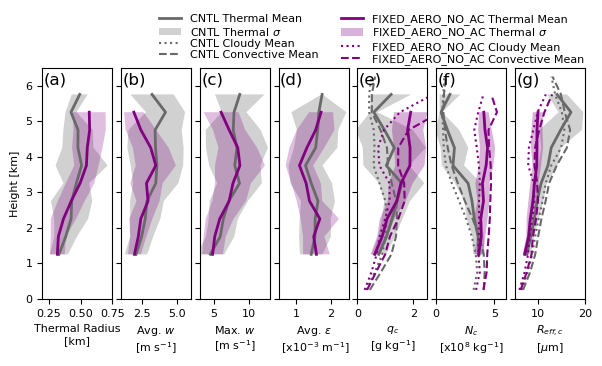

done


In [13]:
cntl_color = 'dimgrey'
sens_color = 'purple'

fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(171)
ax2 = fig.add_subplot(172)
ax3 = fig.add_subplot(173)
ax4 = fig.add_subplot(174)
ax5 = fig.add_subplot(175)
ax6 = fig.add_subplot(176)
ax7 = fig.add_subplot(177)
axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
Fontsize=8
for ax in axlist:
    ax.tick_params(labelsize=Fontsize)
    #ax.grid(which='both',ls='dotted',lw=1,c='dimgrey')
    ax.set_ylim(0,6.5)
ax1.set_ylabel('Height [km]',fontsize=Fontsize)

ax2.yaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax7.yaxis.set_ticklabels([])

big_lw=2.
small_lw=1.5
alpha1=0.3
alpha2=0.25

# Thermal Radius
R_mean_prof_cntl,R_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,R_avg_cntl)
ax1.plot(R_mean_prof_cntl*1.e-3,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL Mean')
ax1.fill_betweenx(z_midbins*1.e-3,(R_mean_prof_cntl-R_std_prof_cntl)*1.e-3,R_mean_prof_cntl*1.e-3,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
ax1.fill_betweenx(z_midbins*1.e-3,R_mean_prof_cntl*1.e-3,(R_mean_prof_cntl+R_std_prof_cntl)*1.e-3,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
R_mean_prof_sens,R_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,R_avg_sens)
ax1.plot(R_mean_prof_sens*1.e-3,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
ax1.fill_betweenx(z_midbins*1.e-3,(R_mean_prof_sens-R_std_prof_sens)*1.e-3,R_mean_prof_sens*1.e-3,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)
ax1.fill_betweenx(z_midbins*1.e-3,R_mean_prof_sens*1.e-3,(R_mean_prof_sens+R_std_prof_sens)*1.e-3,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)

# w_avg
w_avg_mean_prof_cntl,w_avg_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,w_avg_cntl)
ax2.plot(w_avg_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
ax2.fill_betweenx(z_midbins*1.e-3,(w_avg_mean_prof_cntl-w_avg_std_prof_cntl),w_avg_mean_prof_cntl,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
ax2.fill_betweenx(z_midbins*1.e-3,w_avg_mean_prof_cntl,(w_avg_mean_prof_cntl+w_avg_std_prof_cntl),color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
w_avg_mean_prof_sens,w_avg_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,w_avg_sens)
ax2.plot(w_avg_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
ax2.fill_betweenx(z_midbins*1.e-3,(w_avg_mean_prof_sens-w_avg_std_prof_sens),w_avg_mean_prof_sens,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)
ax2.fill_betweenx(z_midbins*1.e-3,w_avg_mean_prof_sens,(w_avg_mean_prof_sens+w_avg_std_prof_sens),color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)


# w_max
w_max_mean_prof_cntl,w_max_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,wmax_avg_cntl)
ax3.plot(w_max_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
ax3.fill_betweenx(z_midbins*1.e-3,(w_max_mean_prof_cntl-w_max_std_prof_cntl),w_max_mean_prof_cntl,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
ax3.fill_betweenx(z_midbins*1.e-3,w_max_mean_prof_cntl,(w_max_mean_prof_cntl+w_max_std_prof_cntl),color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
w_max_mean_prof_sens,w_max_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,wmax_avg_sens)
ax3.plot(w_max_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
ax3.fill_betweenx(z_midbins*1.e-3,(w_max_mean_prof_sens-w_max_std_prof_sens),w_max_mean_prof_sens,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)
ax3.fill_betweenx(z_midbins*1.e-3,w_max_mean_prof_sens,(w_max_mean_prof_sens+w_max_std_prof_sens),color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)


# entr_rate
frac_entr_mean_prof_cntl,frac_entr_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,frac_entr_avg_cntl)
ax4.plot(frac_entr_mean_prof_cntl*1.e3,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
ax4.fill_betweenx(z_midbins*1.e-3,(frac_entr_mean_prof_cntl-frac_entr_std_prof_cntl)*1.e3,frac_entr_mean_prof_cntl*1.e3,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
ax4.fill_betweenx(z_midbins*1.e-3,frac_entr_mean_prof_cntl*1.e3,(frac_entr_mean_prof_cntl+frac_entr_std_prof_cntl)*1.e3,color=cntl_color,alpha=alpha1,label='CNTL $\\sigma$',edgecolor=None)
frac_entr_mean_prof_sens,frac_entr_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,frac_entr_avg_sens)
ax4.plot(frac_entr_mean_prof_sens*1.e3,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
ax4.fill_betweenx(z_midbins*1.e-3,(frac_entr_mean_prof_sens-frac_entr_std_prof_sens)*1.e3,frac_entr_mean_prof_sens*1.e3,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)
ax4.fill_betweenx(z_midbins*1.e-3,frac_entr_mean_prof_sens*1.e3,(frac_entr_mean_prof_sens+frac_entr_std_prof_sens)*1.e3,color=sens_color,alpha=alpha2,label='FIXED_AERO_NO_AC $\\sigma$',edgecolor=None)



# qc
qc_mean_prof_cntl,qc_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,qcloud_avg_cntl*1.e3)
ax5.plot(qc_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL Thermal Mean')
ax5.fill_betweenx(z_midbins*1.e-3,(qc_mean_prof_cntl-qc_std_prof_cntl),qc_mean_prof_cntl,color=cntl_color,alpha=alpha1,label='CNTL Thermal $\\sigma$',edgecolor=None)
ax5.fill_betweenx(z_midbins*1.e-3,qc_mean_prof_cntl,(qc_mean_prof_cntl+qc_std_prof_cntl),color=cntl_color,alpha=alpha1,edgecolor=None)
# In situ
ax5.plot(nearest_qc_cloud*1.e3,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy Mean',ls='dotted')
ax5.plot(nearest_qc_conv*1.e3,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective Mean',ls='dashed')

qc_mean_prof_sens,qc_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,qcloud_avg_sens*1.e3)
ax5.plot(qc_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC Thermal Mean')
ax5.fill_betweenx(z_midbins*1.e-3,(qc_mean_prof_sens-qc_std_prof_sens),qc_mean_prof_sens,color=sens_color,alpha=alpha1,label='FIXED_AERO_NO_AC Thermal $\\sigma$',edgecolor=None)
ax5.fill_betweenx(z_midbins*1.e-3,qc_mean_prof_sens,(qc_mean_prof_sens+qc_std_prof_sens),color=sens_color,alpha=alpha1,edgecolor=None)
# In situ
ax5.plot(nearest_qc_cloud_sens*1.e3,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy Mean',ls='dotted')
ax5.plot(nearest_qc_conv_sens*1.e3,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective Mean',ls='dashed')


# Nc
nc_mean_prof_cntl,nc_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,qncloud_avg_cntl*1.e-8)
ax6.plot(nc_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL Thermal')
ax6.fill_betweenx(z_midbins*1.e-3,(nc_mean_prof_cntl-nc_std_prof_cntl),nc_mean_prof_cntl,color=cntl_color,alpha=alpha1,label='CNTL Thermal $\\sigma$',edgecolor=None)
ax6.fill_betweenx(z_midbins*1.e-3,nc_mean_prof_cntl,(nc_mean_prof_cntl+nc_std_prof_cntl),color=cntl_color,alpha=alpha1,edgecolor=None)

# In situ
ax6.plot(nearest_nc_cloud*1.e-8,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy',ls='dotted')
ax6.plot(nearest_nc_conv*1.e-8,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective',ls='dashed')

nc_mean_prof_sens,nc_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,qncloud_avg_sens*1.e-8)
ax6.plot(nc_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC Thermal')
ax6.fill_betweenx(z_midbins*1.e-3,(nc_mean_prof_sens-nc_std_prof_sens),nc_mean_prof_sens,color=sens_color,alpha=alpha1,label='FIXED_AERO_NO_AC Thermal $\\sigma$',edgecolor=None)
ax6.fill_betweenx(z_midbins*1.e-3,nc_mean_prof_sens,(nc_mean_prof_sens+nc_std_prof_sens),color=sens_color,alpha=alpha1,edgecolor=None)

# In situ
ax6.plot(nearest_nc_cloud_sens*1.e-8,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy',ls='dotted')
ax6.plot(nearest_nc_conv_sens*1.e-8,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective',ls='dashed')


# Reff_c
reff_c_mean_prof_cntl,reff_c_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,reff_c_avg_cntl)
ax7.plot(reff_c_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
ax7.fill_betweenx(z_midbins*1.e-3,(reff_c_mean_prof_cntl-reff_c_std_prof_cntl),reff_c_mean_prof_cntl,color=cntl_color,alpha=alpha1,label='CNTL Thermal $\\sigma$',edgecolor=None)
ax7.fill_betweenx(z_midbins*1.e-3,reff_c_mean_prof_cntl,(reff_c_mean_prof_cntl+reff_c_std_prof_cntl),color=cntl_color,alpha=alpha1,edgecolor=None)

reff_c_mean_prof_sens,reff_c_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,reff_c_avg_sens)
ax7.plot(reff_c_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
ax7.fill_betweenx(z_midbins*1.e-3,(reff_c_mean_prof_sens-reff_c_std_prof_sens),reff_c_mean_prof_sens,color=sens_color,alpha=alpha1,label='FIXED_AERO_NO_AC Thermal $\\sigma$',edgecolor=None)
ax7.fill_betweenx(z_midbins*1.e-3,reff_c_mean_prof_sens,(reff_c_mean_prof_sens+reff_c_std_prof_sens),color=sens_color,alpha=alpha1,edgecolor=None)

# In situ
ax7.plot(nearest_reff_c_cloud,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy',ls='dotted')
ax7.plot(nearest_reff_c_conv,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective',ls='dashed')
ax7.plot(nearest_reff_c_cloud_sens,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy',ls='dotted')
ax7.plot(nearest_reff_c_conv_sens,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective',ls='dashed')


ax5.legend(loc='upper center',bbox_to_anchor=(0.2,1.275),fontsize=Fontsize,ncol=2,framealpha=False,labelspacing=0.1)

ax1.set_xlabel('Thermal Radius\n[km]',fontsize=Fontsize)
ax2.set_xlabel('Avg. $w$\n[m s$^{-1}$]',fontsize=Fontsize)
ax3.set_xlabel('Max. $w$\n[m s$^{-1}$]',fontsize=Fontsize)
ax4.set_xlabel('Avg. $\\epsilon$\n [x10$^{-3}$ m$^{-1}$]',fontsize=Fontsize)
ax5.set_xlabel('$q_{c}$\n[g kg$^{-1}$]',fontsize=Fontsize)
ax6.set_xlabel('$N_{c}$\n[x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
ax7.set_xlabel('$R_{eff,c}$\n[$\\mu$m]',fontsize=Fontsize)

ax1.set_xlim(0.2,0.75)
ax2.set_xlim(1.,6)
ax3.set_xlim(3,13)
ax4.set_xlim(0.5,2.5)
ax5.set_xlim(0,2.5)
ax6.set_xlim(0,6)
ax7.set_xlim(5,20)



labs = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
dumi=0
for ax in axlist:
    ax.text(0.02,0.98,labs[dumi],fontsize=Fontsize*1.5,transform=ax.transAxes,ha='left',va='top')
    dumi+=1

plt.subplots_adjust(wspace=0.125)


fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_thermal_profiles_with_stddev.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  
print('done')

# Optional version of Fig. 13 that doesn't include the standard deviation

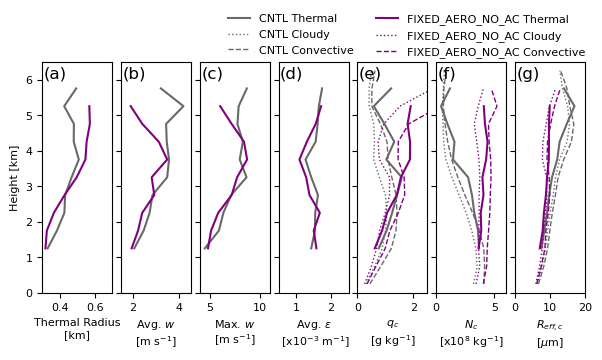

In [14]:
cntl_color = 'dimgrey'
sens_color = 'purple'

fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(171)
ax2 = fig.add_subplot(172)
ax3 = fig.add_subplot(173)
ax4 = fig.add_subplot(174)
ax5 = fig.add_subplot(175)
ax6 = fig.add_subplot(176)
ax7 = fig.add_subplot(177)
axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
Fontsize=8
for ax in axlist:
    ax.tick_params(labelsize=Fontsize)
    #ax.grid(which='both',ls='dotted',lw=1,c='dimgrey')
    ax.set_ylim(0,6.5)
ax1.set_ylabel('Height [km]',fontsize=Fontsize)

ax2.yaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax7.yaxis.set_ticklabels([])

big_lw=1.5
small_lw=1.

# Thermal Radius
R_mean_prof_cntl,R_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,R_avg_cntl)
ax1.plot(R_mean_prof_cntl*1.e-3,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
R_mean_prof_sens,R_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,R_avg_sens)
ax1.plot(R_mean_prof_sens*1.e-3,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')

# w_avg
w_avg_mean_prof_cntl,w_avg_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,w_avg_cntl)
ax2.plot(w_avg_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
w_avg_mean_prof_sens,w_avg_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,w_avg_sens)
ax2.plot(w_avg_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')

# w_max
w_max_mean_prof_cntl,w_max_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,wmax_avg_cntl)
ax3.plot(w_max_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
w_max_mean_prof_sens,w_max_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,wmax_avg_sens)
ax3.plot(w_max_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')


# entr_rate
frac_entr_mean_prof_cntl,frac_entr_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,frac_entr_avg_cntl)
ax4.plot(frac_entr_mean_prof_cntl*1.e3,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
frac_entr_mean_prof_sens,frac_entr_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,frac_entr_avg_sens)
ax4.plot(frac_entr_mean_prof_sens*1.e3,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')



# qc
qc_mean_prof_cntl,qc_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,qcloud_avg_cntl*1.e3)
ax5.plot(qc_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL Thermal')
# In situ
ax5.plot(nearest_qc_cloud*1.e3,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy',ls='dotted')
ax5.plot(nearest_qc_conv*1.e3,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective',ls='dashed')

qc_mean_prof_sens,qc_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,qcloud_avg_sens*1.e3)
ax5.plot(qc_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC Thermal')
# In situ
ax5.plot(nearest_qc_cloud_sens*1.e3,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy',ls='dotted')
ax5.plot(nearest_qc_conv_sens*1.e3,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective',ls='dashed')


# Nc
nc_mean_prof_cntl,nc_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,qncloud_avg_cntl*1.e-8)
ax6.plot(nc_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL Thermal')
# In situ
ax6.plot(nearest_nc_cloud*1.e-8,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy',ls='dotted')
ax6.plot(nearest_nc_conv*1.e-8,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective',ls='dashed')

nc_mean_prof_sens,nc_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,qncloud_avg_sens*1.e-8)
ax6.plot(nc_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC Thermal')
# In situ
ax6.plot(nearest_nc_cloud_sens*1.e-8,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy',ls='dotted')
ax6.plot(nearest_nc_conv_sens*1.e-8,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective',ls='dashed')


# Reff_c
reff_c_mean_prof_cntl,reff_c_std_prof_cntl = calc_mean_std_prof(z_bins,z_thermal_cntl,reff_c_avg_cntl)
ax7.plot(reff_c_mean_prof_cntl,z_midbins*1.e-3,lw=big_lw,c=cntl_color,label='CNTL')
reff_c_mean_prof_sens,reff_c_std_prof_sens = calc_mean_std_prof(z_bins,z_thermal_sens,reff_c_avg_sens)
ax7.plot(reff_c_mean_prof_sens,z_midbins*1.e-3,lw=big_lw,c=sens_color,label='FIXED_AERO_NO_AC')
# In situ
ax7.plot(nearest_reff_c_cloud,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Cloudy',ls='dotted')
ax7.plot(nearest_reff_c_conv,z_midbins*1.e-3,lw=small_lw,c=cntl_color,label='CNTL Convective',ls='dashed')
ax7.plot(nearest_reff_c_cloud_sens,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Cloudy',ls='dotted')
ax7.plot(nearest_reff_c_conv_sens,z_midbins*1.e-3,lw=small_lw,c=sens_color,label='FIXED_AERO_NO_AC Convective',ls='dashed')


ax5.legend(loc='upper center',bbox_to_anchor=(0.7,1.25),fontsize=Fontsize,ncol=2,framealpha=False)

ax1.set_xlabel('Thermal Radius\n[km]',fontsize=Fontsize)
ax2.set_xlabel('Avg. $w$\n[m s$^{-1}$]',fontsize=Fontsize)
ax3.set_xlabel('Max. $w$\n[m s$^{-1}$]',fontsize=Fontsize)
ax4.set_xlabel('Avg. $\\epsilon$\n [x10$^{-3}$ m$^{-1}$]',fontsize=Fontsize)
ax5.set_xlabel('$q_{c}$\n[g kg$^{-1}$]',fontsize=Fontsize)
ax6.set_xlabel('$N_{c}$\n[x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
ax7.set_xlabel('$R_{eff,c}$\n[$\\mu$m]',fontsize=Fontsize)

ax1.set_xlim(0.3,0.7)
ax2.set_xlim(1.5,4.5)
ax3.set_xlim(4,11)
ax4.set_xlim(0.5,2.5)
ax5.set_xlim(0,2.5)
ax6.set_xlim(0,6)
ax7.set_xlim(0,20)



labs = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
dumi=0
for ax in axlist:
    ax.text(0.02,0.98,labs[dumi],fontsize=Fontsize*1.5,transform=ax.transAxes,ha='left',va='top')
    dumi+=1

plt.subplots_adjust(wspace=0.125)


fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_thermal_profiles.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  

# Now begin processing that will calculate the mean of various thermal properties as a function of the fractional entrainment rate
## Makes Fig. 14 of manuscript

In [19]:
frac_entr_cntl_flat = np.ndarray.flatten(frac_entr_cntl)
qncloud_c_cntl_flat = np.ndarray.flatten(qncloud_c_cntl)
qcloud_c_cntl_flat = np.ndarray.flatten(qcloud_c_cntl)
reff_c_c_cntl_flat = np.ndarray.flatten(reff_c_c_cntl)
z_centre_c_cntl_flat = np.ndarray.flatten(z_centre_c_cntl)
w_avg_c_cntl_flat = np.ndarray.flatten(w_avg_c_cntl)
wmax_c_cntl_flat = np.ndarray.flatten(wmax_c_cntl)

frac_entr_sens_flat = np.ndarray.flatten(frac_entr_sens)
qncloud_c_sens_flat = np.ndarray.flatten(qncloud_c_sens)
qcloud_c_sens_flat = np.ndarray.flatten(qcloud_c_sens)
reff_c_c_sens_flat = np.ndarray.flatten(reff_c_c_sens)
z_centre_c_sens_flat = np.ndarray.flatten(z_centre_c_sens)
w_avg_c_sens_flat = np.ndarray.flatten(w_avg_c_sens)
wmax_c_sens_flat = np.ndarray.flatten(wmax_c_sens)

dumid = np.where(~np.isnan(frac_entr_cntl_flat))
frac_entr_cntl_flat = frac_entr_cntl_flat[dumid]
qncloud_c_cntl_flat = qncloud_c_cntl_flat[dumid]
qcloud_c_cntl_flat = qcloud_c_cntl_flat[dumid]
reff_c_c_cntl_flat = reff_c_c_cntl_flat[dumid]
z_centre_c_cntl_flat = z_centre_c_cntl_flat[dumid]
w_avg_c_cntl_flat = w_avg_c_cntl_flat[dumid]
wmax_c_cntl_flat = wmax_c_cntl_flat[dumid]


dumid = np.where(~np.isnan(frac_entr_sens_flat))
frac_entr_sens_flat = frac_entr_sens_flat[dumid]
qncloud_c_sens_flat = qncloud_c_sens_flat[dumid]
qcloud_c_sens_flat = qcloud_c_sens_flat[dumid]
reff_c_c_sens_flat = reff_c_c_sens_flat[dumid]
z_centre_c_sens_flat = z_centre_c_sens_flat[dumid]
w_avg_c_sens_flat = w_avg_c_sens_flat[dumid]
wmax_c_sens_flat = wmax_c_sens_flat[dumid]

print(np.min(frac_entr_cntl_flat),np.max(frac_entr_cntl_flat))
print(np.min(qncloud_c_cntl_flat),np.max(qncloud_c_cntl_flat))
print(np.min(reff_c_c_cntl_flat),np.max(reff_c_c_cntl_flat))
print(np.min(z_centre_c_cntl_flat),np.max(z_centre_c_cntl_flat))

print(np.min(frac_entr_sens_flat),np.max(frac_entr_sens_flat))
print(np.min(qncloud_c_sens_flat),np.max(qncloud_c_sens_flat))
print(np.min(reff_c_c_sens_flat),np.max(reff_c_c_sens_flat))
print(np.min(z_centre_c_sens_flat),np.max(z_centre_c_sens_flat))


0.0004158943562481201 0.01366052976868247
3285156.5401959224 558152334.9240719
3.65574160690852 33.309918257139735
1060.1840190676746 6190.375518061767
0.0004929271164771812 0.008394431098551805
107629013.64656536 617257130.1478834
3.642303539292207 12.522823567254411
1060.0000000000002 5382.121212121211


In [20]:
def calc_mean_as_func_frac_entr(frac_entr,var,bins):
    mean_var = []
    std_var = []
    for ii in range(len(bins)-1):
        dumid = np.where( (frac_entr >= bins[ii]) & (frac_entr < bins[ii+1]))
        #print(np.size(dumid))
        if np.size(dumid) >= 5.:
            dumid = dumid[0]
            mean_var.append(np.mean(var[dumid]))
            std_var.append(np.std(var[dumid]))
        else:
            mean_var.append(np.nan)
            std_var.append(np.nan)
    mean_var = np.array(mean_var)
    std_var = np.array(std_var)
    return mean_var,std_var

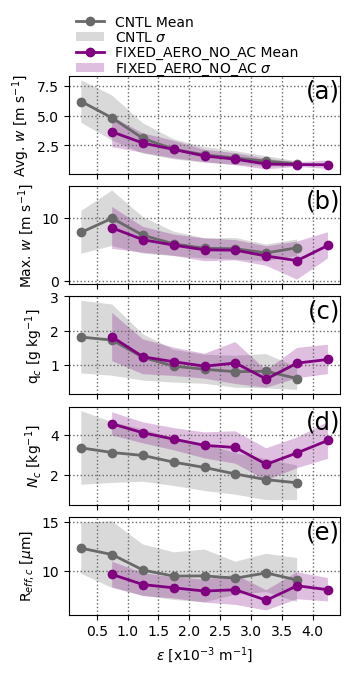

done


In [22]:
fig = plt.figure(figsize=(3.5,7))
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
Fontsize=10
axlist = [ax1,ax2,ax3,ax4,ax5]
for ax in axlist:
    ax.grid(which='both',ls='dotted',c='dimgrey',lw=1)
    ax.tick_params(labelsize=Fontsize)
    ax.set_xticks(np.arange(0.5,5.5,0.5))
    
ax1.set_ylabel('Avg. $w$ [m s$^{-1}$]',fontsize=Fontsize)
ax2.set_ylabel('Max. $w$ [m s$^{-1}$]',fontsize=Fontsize)
ax3.set_ylabel('q$_{c}$ [g kg$^{-1}$]',fontsize=Fontsize)    
ax4.set_ylabel('$N_{c}$ [kg$^{-1}$]',fontsize=Fontsize)
ax5.set_ylabel('R$_{eff,c}$ [$\\mu$m]',fontsize=Fontsize)

ax5.set_xlabel('$\\epsilon$ [x10$^{-3}$ m$^{-1}$]',fontsize=Fontsize)
#ax5.set_xticks(np.arange(0.5,4.5,0.5))

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])

alpha1=0.25
alpha2=0.25


mean_frac_entr_bins = np.arange(0,5.5,0.5)*1.e-3
mean_frac_entr_midbins = np.array([0.5*(mean_frac_entr_bins[dd]+mean_frac_entr_bins[dd+1]) for dd in range(len(mean_frac_entr_bins)-1)])
max_frac_entr_bins = np.arange(0,5.5,0.5)*1.e-3
max_frac_entr_midbins = np.array([0.5*(max_frac_entr_bins[dd]+max_frac_entr_bins[dd+1]) for dd in range(len(max_frac_entr_bins)-1)])

#-------------------------------
# CNTL
#-------------------------------
# avg_w
w_avg_mean,w_avg_std = calc_mean_as_func_frac_entr(frac_entr_cntl_flat,w_avg_c_cntl_flat,mean_frac_entr_bins)
ax1.plot(mean_frac_entr_midbins*1.e3,w_avg_mean,c=cntl_color,lw=2,marker='o',label='CNTL Mean')
ax1.fill_between(mean_frac_entr_midbins*1.e3,w_avg_mean-w_avg_std,w_avg_mean,color=cntl_color,alpha=alpha1,edgecolor=None,label='CNTL $\\sigma$')
ax1.fill_between(mean_frac_entr_midbins*1.e3,w_avg_mean,w_avg_mean+w_avg_std,color=cntl_color,alpha=alpha1,edgecolor=None)
# max_w
wmax_avg_mean,wmax_avg_std = calc_mean_as_func_frac_entr(frac_entr_cntl_flat,wmax_c_cntl_flat,mean_frac_entr_bins)
ax2.plot(mean_frac_entr_midbins*1.e3,wmax_avg_mean,c=cntl_color,lw=2,marker='o')
ax2.fill_between(mean_frac_entr_midbins*1.e3,wmax_avg_mean-wmax_avg_std,wmax_avg_mean,color=cntl_color,alpha=alpha1,edgecolor=None)
ax2.fill_between(mean_frac_entr_midbins*1.e3,wmax_avg_mean,wmax_avg_mean+wmax_avg_std,color=cntl_color,alpha=alpha1,edgecolor=None)
# qc
qc_mean,qc_std = calc_mean_as_func_frac_entr(frac_entr_cntl_flat,qcloud_c_cntl_flat*1.e3,mean_frac_entr_bins)
ax3.plot(mean_frac_entr_midbins*1.e3,qc_mean,c=cntl_color,lw=2,marker='o')
ax3.fill_between(mean_frac_entr_midbins*1.e3,qc_mean-qc_std,qc_mean,color=cntl_color,alpha=alpha1,edgecolor=None)
ax3.fill_between(mean_frac_entr_midbins*1.e3,qc_mean,qc_mean+qc_std,color=cntl_color,alpha=alpha1,edgecolor=None)
# Nc
nc_mean,nc_std = calc_mean_as_func_frac_entr(frac_entr_cntl_flat,qncloud_c_cntl_flat*1.e-8,mean_frac_entr_bins)
ax4.plot(mean_frac_entr_midbins*1.e3,nc_mean,c=cntl_color,lw=2,marker='o')
ax4.fill_between(mean_frac_entr_midbins*1.e3,nc_mean-nc_std,nc_mean,color=cntl_color,alpha=alpha1,edgecolor=None)
ax4.fill_between(mean_frac_entr_midbins*1.e3,nc_mean,nc_mean+nc_std,color=cntl_color,alpha=alpha1,edgecolor=None)
# Reff_c
reff_c_mean,reff_c_std = calc_mean_as_func_frac_entr(frac_entr_cntl_flat,reff_c_c_cntl_flat,mean_frac_entr_bins)
ax5.plot(mean_frac_entr_midbins*1.e3,reff_c_mean,c=cntl_color,lw=2,marker='o')
ax5.fill_between(mean_frac_entr_midbins*1.e3,reff_c_mean-reff_c_std,reff_c_mean,color=cntl_color,alpha=alpha1,edgecolor=None)
ax5.fill_between(mean_frac_entr_midbins*1.e3,reff_c_mean,reff_c_mean+reff_c_std,color=cntl_color,alpha=alpha1,edgecolor=None)

#-------------------------------
# SENS
#-------------------------------
# avg_w
w_avg_mean,w_avg_std = calc_mean_as_func_frac_entr(frac_entr_sens_flat,w_avg_c_sens_flat,mean_frac_entr_bins)
ax1.plot(mean_frac_entr_midbins*1.e3,w_avg_mean,c=sens_color,lw=2,marker='o',label='FIXED_AERO_NO_AC Mean')
ax1.fill_between(mean_frac_entr_midbins*1.e3,w_avg_mean-w_avg_std,w_avg_mean,color=sens_color,alpha=alpha1,edgecolor=None,label='FIXED_AERO_NO_AC $\\sigma$')
ax1.fill_between(mean_frac_entr_midbins*1.e3,w_avg_mean,w_avg_mean+w_avg_std,color=sens_color,alpha=alpha1,edgecolor=None)
# max_w
wmax_avg_mean,wmax_avg_std = calc_mean_as_func_frac_entr(frac_entr_sens_flat,wmax_c_sens_flat,mean_frac_entr_bins)
ax2.plot(mean_frac_entr_midbins*1.e3,wmax_avg_mean,c=sens_color,lw=2,marker='o')
ax2.fill_between(mean_frac_entr_midbins*1.e3,wmax_avg_mean-wmax_avg_std,wmax_avg_mean,color=sens_color,alpha=alpha1,edgecolor=None)
ax2.fill_between(mean_frac_entr_midbins*1.e3,wmax_avg_mean,wmax_avg_mean+wmax_avg_std,color=sens_color,alpha=alpha1,edgecolor=None)
#qc
qc_mean,qc_std = calc_mean_as_func_frac_entr(frac_entr_sens_flat,qcloud_c_sens_flat*1.e3,mean_frac_entr_bins)
ax3.plot(mean_frac_entr_midbins*1.e3,qc_mean,c=sens_color,lw=2,marker='o')
ax3.fill_between(mean_frac_entr_midbins*1.e3,qc_mean-qc_std,qc_mean,color=sens_color,alpha=alpha1,edgecolor=None)
ax3.fill_between(mean_frac_entr_midbins*1.e3,qc_mean,qc_mean+qc_std,color=sens_color,alpha=alpha1,edgecolor=None)
#Nc
nc_mean,nc_std = calc_mean_as_func_frac_entr(frac_entr_sens_flat,qncloud_c_sens_flat*1.e-8,mean_frac_entr_bins)
ax4.plot(mean_frac_entr_midbins*1.e3,nc_mean,c=sens_color,lw=2,marker='o')
ax4.fill_between(mean_frac_entr_midbins*1.e3,nc_mean-nc_std,nc_mean,color=sens_color,alpha=alpha1,edgecolor=None)
ax4.fill_between(mean_frac_entr_midbins*1.e3,nc_mean,nc_mean+nc_std,color=sens_color,alpha=alpha1,edgecolor=None)
# Reff_c
reff_c_mean,reff_c_std = calc_mean_as_func_frac_entr(frac_entr_sens_flat,reff_c_c_sens_flat,mean_frac_entr_bins)
ax5.plot(mean_frac_entr_midbins*1.e3,reff_c_mean,c=sens_color,lw=2,marker='o')
ax5.fill_between(mean_frac_entr_midbins*1.e3,reff_c_mean-reff_c_std,reff_c_mean,color=sens_color,alpha=alpha1,edgecolor=None)
ax5.fill_between(mean_frac_entr_midbins*1.e3,reff_c_mean,reff_c_mean+reff_c_std,color=sens_color,alpha=alpha1,edgecolor=None)

labs = ['(a)','(b)','(c)','(d)','(e)']
dumi=0
for ax in axlist:
    ax.text(1,0.97,labs[dumi],fontsize=Fontsize*1.75,transform=ax.transAxes,va='top',ha='right')
    dumi+=1
ax1.legend(loc='upper left',fontsize=Fontsize,framealpha=False,ncol=1,bbox_to_anchor=(-0.02,1.75),labelspacing=0.1)
    
    
plt.subplots_adjust(hspace=0.125)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_thermal_props_func_frac_entr.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  
print('done')

# Plot similar version of Fig. 14 but also distributed by height bins
## Not used in manuscript

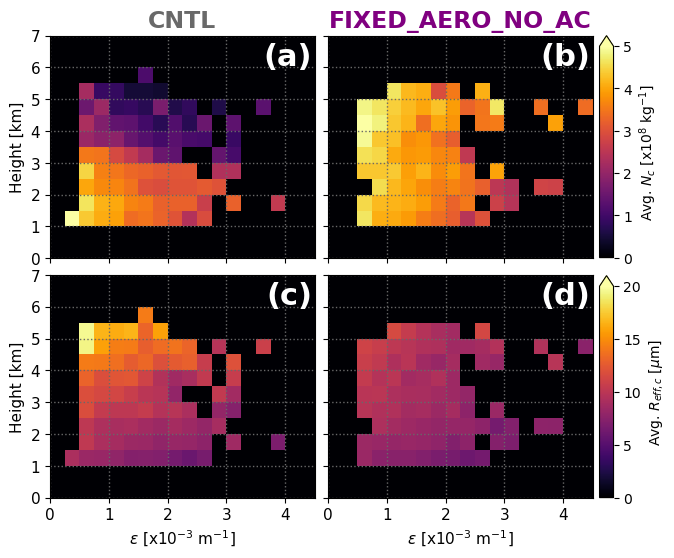

In [23]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axlist = [ax1,ax2,ax3,ax4]
Fontsize=11
for ax in axlist:
    ax.grid(which='both',ls='dotted',c='dimgrey',lw=1)
    ax.tick_params(labelsize=Fontsize)
    ax.set_yticks(np.arange(0,8,1))
    ax.set_xticks(np.arange(0,5,1))
ax2.set_yticklabels([])
ax4.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
    

ax1.set_ylabel('Height [km]',fontsize=Fontsize)
ax3.set_ylabel('Height [km]',fontsize=Fontsize)

ax3.set_xlabel('$\\epsilon$ [x10$^{-3}$ m$^{-1}$]',fontsize=Fontsize)
ax4.set_xlabel('$\\epsilon$ [x10$^{-3}$ m$^{-1}$]',fontsize=Fontsize)
#ax1.set_xlabel('$N_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
#ax2.set_xlabel('$N_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
#ax3.set_xlabel('$R_{eff,c}$ [$\\mu$m]',fontsize=Fontsize)
#ax4.set_xlabel('$R_{eff,c}$ [$\\mu$m]',fontsize=Fontsize)

height_bins = np.arange(0,7.5,0.5)
nc_bins = np.arange(0,5.5,0.5)
reff_cbins = np.arange(0,32.5,2.5)
frac_entr_bins = np.arange(0,4.75,0.25)

num_height_bins = len(height_bins)
num_frac_entr_bins = len(frac_entr_bins)
cntl_mean_nc = np.zeros((num_frac_entr_bins-1,num_height_bins-1))
sens_mean_nc = np.zeros((num_frac_entr_bins-1,num_height_bins-1))
cntl_mean_reff_c = np.zeros((num_frac_entr_bins-1,num_height_bins-1))
sens_mean_reff_c = np.zeros((num_frac_entr_bins-1,num_height_bins-1))


fill_val = 0.
thresh=1.
for ii in range(num_frac_entr_bins-1):
    for jj in range(num_height_bins-1):
        
        # CNTL
        dumid_cntl = np.where( (frac_entr_cntl_flat*1.e3 > frac_entr_bins[ii]) & (frac_entr_cntl_flat*1.e3 <= frac_entr_bins[ii+1]) & (z_centre_c_cntl_flat*1.e-3 > height_bins[jj]) & (z_centre_c_cntl_flat*1.e-3 <= height_bins[jj+1]) )
        if np.size(dumid_cntl) > thresh:
            dumid_cntl = dumid_cntl[0]
            cntl_mean_nc[ii,jj] = np.mean(qncloud_c_cntl_flat[dumid_cntl])
            cntl_mean_reff_c[ii,jj] = np.mean(reff_c_c_cntl_flat[dumid_cntl])
        else:
            cntl_mean_nc[ii,jj] = fill_val
            cntl_mean_reff_c[ii,jj] = fill_val
            
        # SENS
        dumid_sens = np.where( (frac_entr_sens_flat*1.e3 > frac_entr_bins[ii]) & (frac_entr_sens_flat*1.e3 <= frac_entr_bins[ii+1]) & (z_centre_c_sens_flat*1.e-3 > height_bins[jj]) & (z_centre_c_sens_flat*1.e-3 <= height_bins[jj+1]) )
        if np.size(dumid_sens) > thresh:
            dumid_sens = dumid_sens[0]
            sens_mean_nc[ii,jj] = np.mean(qncloud_c_sens_flat[dumid_sens])
            sens_mean_reff_c[ii,jj] = np.mean(reff_c_c_sens_flat[dumid_sens])
        else:
            sens_mean_nc[ii,jj] = fill_val
            sens_mean_reff_c[ii,jj] = fill_val
cbar_bool = False
#=================================================
# CNTL
#=================================================
#tmpplot1=ax1.hist2d(frac_entr_cntl_flat*1.e3,z_centre_c_cntl_flat*1.e-3,bins=[frac_entr_bins,height_bins],cmap='inferno',density=True,norm=matplotlib.colors.LogNorm())
#tmpplot2=ax3.hist2d(frac_entr_cntl_flat*1.e3,z_centre_c_cntl_flat*1.e-3,bins=[frac_entr_bins,height_bins],cmap='inferno',density=True,norm=matplotlib.colors.LogNorm())
tmpplot1=ax1.pcolormesh(frac_entr_bins,height_bins,cntl_mean_nc.T*1.e-8,cmap='inferno',shading='flat',vmin=0,vmax=5)
if cbar_bool:
    cbar1 = plt.colorbar(tmpplot1,pad=0.01,extend='max')
    cbar1.ax.set_ylabel('$N_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
    cbar1.ax.tick_params(labelsize=Fontsize)
tmpplot2=ax3.pcolormesh(frac_entr_bins,height_bins,cntl_mean_reff_c.T,cmap='inferno',shading='flat',vmin=0,vmax=20)
if cbar_bool:
    cbar2 = plt.colorbar(tmpplot2,pad=0.01,extend='max')
    cbar2.ax.set_ylabel('$R_{eff,c}$ [$\\mu$m]',fontsize=Fontsize)
    cbar2.ax.tick_params(labelsize=Fontsize)
    cbar2.ax.set_yticks(np.arange(0,25,5))

#=================================================
# FIXED_AERO_NO_AC
#=================================================
#tmpplot3=ax2.hist2d(frac_entr_sens_flat*1.e3,z_centre_c_sens_flat*1.e-3,bins=[frac_entr_bins,height_bins],cmap='inferno',density=True,norm=matplotlib.colors.LogNorm())
#tmpplot4=ax4.hist2d(frac_entr_sens_flat*1.e3,z_centre_c_sens_flat*1.e-3,bins=[frac_entr_bins,height_bins],cmap='inferno',density=True,norm=matplotlib.colors.LogNorm())
tmpplot3=ax2.pcolormesh(frac_entr_bins,height_bins,sens_mean_nc.T*1.e-8,cmap='inferno',shading='flat',vmin=0,vmax=5)
if cbar_bool:
    cbar3 = plt.colorbar(tmpplot3,pad=0.01,extend='max')
    cbar3.ax.set_ylabel('$N_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
    cbar3.ax.tick_params(labelsize=Fontsize)
tmpplot4=ax4.pcolormesh(frac_entr_bins,height_bins,sens_mean_reff_c.T,cmap='inferno',shading='flat',vmin=0,vmax=20)
if cbar_bool:
    cbar4 = plt.colorbar(tmpplot4,pad=0.01,extend='max')
    cbar4.ax.set_ylabel('$R_{eff,c}$ [$\\mu$m]',fontsize=Fontsize)
    cbar4.ax.tick_params(labelsize=Fontsize)
    cbar4.ax.set_yticks(np.arange(0,25,5))

    
# Nc colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cbar_ax = fig.add_axes([0.91,0.51,0.02,0.37])
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='inferno'),
             cax=cbar_ax, orientation='vertical', label='Avg. $N_{c}$ [x10$^{8}$ kg$^{-1}$]',extend='max')

# Reff_c colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=20)
cbar_ax = fig.add_axes([0.91,0.11,0.02,0.37])
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='inferno'),
             cax=cbar_ax, orientation='vertical', label='Avg. $R_{eff,c}$ [$\\mu$m]',extend='max')

ax1.set_title('CNTL',fontweight='bold',fontsize=Fontsize*1.55,c='dimgrey')
ax2.set_title('FIXED_AERO_NO_AC',fontweight='bold',fontsize=Fontsize*1.55,c='purple')

labs=['(a)','(b)','(c)','(d)']
dumi=0
for ax in axlist:
    ax.text(0.99,0.97,labs[dumi],fontsize=Fontsize*2.,c='white',transform=ax.transAxes,ha='right',va='top',fontweight='bold')
    dumi+=1
            
plt.subplots_adjust(hspace=0.075,wspace=0.05)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_Nd_Reff_vs_height_frac_entr.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  